# "Model Design using Pytorch"
- toc: true 
- badges: true
- comments: true
- sticky_rank: 1
- author: josua naiborhu
- categories: [Pytorch, Neural Network, activation function,loss]

In [5]:
from IPython.display import Image
Image(url="{{site.baseurl}}/images/gradientdescent.gif")

Neural Network has been evolving recently. Many application has been developed by using neural network. The development of GPU provided by big company like NVIDIA has fasten how the training process in Architecture of Neural network that needs many parameters in order to get better result for any kind of problems. You can see on the GIf above how neural network works throguh many layers that involve many parameters that can create good output that can identify the real value. The practical way is image identification where Neural network through combining many layers and parameters, activation function, and loss that can be improved to identify the image based on the GIF above. We will learn the implementation through Pytorch in this tutorial.

## Study Case 1
You work as an assistant of the mayor of Somerville and the HR department has 
asked you to build a model capable of predicting whether a person is happy with 
the current administration based on their satisfaction with the city's services

In [6]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import torch 
import torch.nn as nn 
import torch.optim as optim
import warnings
warnings.filterwarnings("ignore")

In [7]:
df = pd.read_csv("SomervilleHappinessSurvey2015.csv")
df.head()

,D,X1,X2,X3,X4,X5,X6
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5


## Columns Information:

- D = decision attribute (D) with values 0 (unhappy) and 1 (happy)
- X1 = the availability of information about the city services
- X2 = the cost of housing
- X3 = the overall quality of public schools
- X4 = your trust in the local police
- X5 = the maintenance of streets and sidewalks
 X6 = the availability of social community events

- Attributes X1 to X6 have values 1 to 5.

In [8]:
# Divide the features and target/label
X = torch.tensor(df.drop("D",axis=1).astype(np.float32).values)
y = torch.tensor(df["D"].astype(np.float32).values)

In [9]:
X[:10]

tensor([[3., 3., 3., 4., 2., 4.],
        [3., 2., 3., 5., 4., 3.],
        [5., 3., 3., 3., 3., 5.],
        [5., 4., 3., 3., 3., 5.],
        [5., 4., 3., 3., 3., 5.],
        [5., 5., 3., 5., 5., 5.],
        [3., 1., 2., 2., 1., 3.],
        [5., 4., 4., 4., 4., 5.],
        [4., 1., 4., 4., 4., 4.],
        [4., 4., 4., 2., 5., 5.]])

In [10]:
# Create a simple sequential neural network torch.nn
# 6 from how many features we have 
# output whether happy or unhappy
model = nn.Sequential(nn.Linear(6,1),
                     nn.Sigmoid())
print(model)


Sequential(
  (0): Linear(in_features=6, out_features=1, bias=True)
  (1): Sigmoid()
)


In [11]:
# Create loss function for classification problem and optimizer 
loss_func = nn.MSELoss()
optimizer = optim.Adam(model.parameters(),lr=1e-2)


In [12]:
# Do training process 
losses =[]
for i in range(20):
    y_pred = model(X)
    loss = loss_func(y_pred,y)
    # item() is used for getting value from tensor 
    losses.append(loss.item())
    optimizer.zero_grad()
    #do back propagation
    loss.backward()
    #update weights during backward propagation
    optimizer.step()
    
    if i%5 ==0:
        print(i,loss.item())
    

0 0.44411277770996094
5 0.34529080986976624
10 0.2627233564853668
15 0.27324753999710083


## Plot the loss for each epochs

Text(0, 0.5, 'Loss')

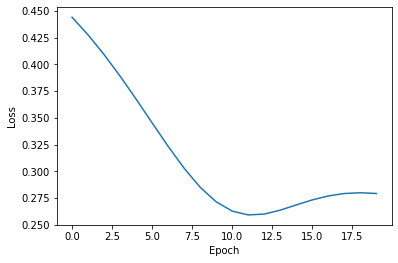

In [13]:
plt.plot(range(0,20),losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")

This is just a simple sequential neural network by implementing pytorch. We will deep dive into a process of building model in the study case 2 where we implement the process of Data Science lifecycle from cleaning the data,splitting the data, making the prediction and evaluating the prediction. 

## Study Case 2

## Deep Learning in Bank 
Deep Learning has been implementing in many sectors including Bank.The problem thas has been happening for this sector is to predict whether bank should grant loan for the customers who will be making credit card. This is essential for Bank because it can measure how they can validate how much money that they can provide and estimate the profit from customers who will use the credit card based on a period of time. We will detect the customers who will be potential to grant loan that can affect to the income of the bank through this dataset. 

We will follow a few steps before modelling our data into ANN using Pytorch including :
- Understand the data including dealing with quality of data
- rescale the features (giving different scales for each features may result that a given features is more important thatn others as it has higher numerical values)
- split the data

In [ ]:
df_credit = pd.read_excel("default of credit card clients.xls",skiprows=1)
df_credit.head()

In [ ]:
print(f"Rows : {df_credit.shape[0]}, Columns:{df_credit.shape[1]}")


In [ ]:
data_clean =df_credit.drop(["ID","SEX"],axis=1)
data_clean.head()

In [ ]:
# Check the missing values
(data_clean.isnull().sum()/data_clean.shape[0]).plot()

In [ ]:
data_clean.describe()

In [ ]:
# Check Outliers 
outliers  ={}

for i in range(data_clean.shape[1]):
    min_t = data_clean[data_clean.columns[i]].mean()-(3*data_clean[data_clean.columns[i]].std())
    max_t = data_clean[data_clean.columns[i]].mean()+(3*data_clean[data_clean.columns[i]].std())
    
    count =0
    for j in data_clean[data_clean.columns[i]]:
        if j < min_t or j > max_t:
            count +=1
            
    percentage = count/data_clean.shape[0]
    
    outliers[data_clean.columns[i]] = round(percentage,3)
    

In [ ]:
from pprint import pprint
pprint(outliers)

In [ ]:
# Check Imbalance class 
data_clean["default payment next month"].value_counts().plot(kind="bar")

In [ ]:
target = data_clean["default payment next month"]
yes = target[target == 1].count()
no = target[target == 0].count()

In [ ]:
data_yes = data_clean[data_clean["default payment next month"] == 1]
data_no = data_clean[data_clean["default payment next month"] == 0]
over_sampling = data_yes.sample(no, replace=True, \
                                random_state = 0)
data_resampled = pd.concat([data_no, over_sampling], \
                            axis=0)

In [ ]:
# Check balance class after oversampling
data_resampled["default payment next month"].value_counts().plot(kind="bar")

In [ ]:
data_resampled = data_resampled.reset_index(drop=True)
X = data_resampled.drop("default payment next month",axis=1)
y =data_resampled["default payment next month"]

In [ ]:
# Rescale the data between 0 to 1
X = (X-X.min())/(X.max()-X.min())
X.head()

In [ ]:
final_data =pd.concat([X,y],axis=1)
final_data.to_csv("data_prepared.csv",index=False)

# Build Model

In [ ]:
import torch.nn.functional as F
from sklearn.model_selection import train_test_split 
from sklearn.utils import shuffle 
from sklearn.metrics import accuracy_score



In [ ]:
data = pd.read_csv("data_prepared.csv")
data.head()

In [ ]:
# Divide the target and features
X = data.drop("default payment next month",axis=1)
y =data["default payment next month"]


In [ ]:
X_new , X_test,y_new,y_test =train_test_split(X,y,test_size=0.2,random_state=3)
dev_per = X_test.shape[0]/X_new.shape[0]
X_train,X_dev,y_train,y_dev = train_test_split(X_new,y_new,test_size=dev_per,random_state=3)


In [ ]:
print("Training sets:",X_train.shape, y_train.shape)
print("Validation sets:",X_dev.shape, y_dev.shape)
print("Testing sets:",X_test.shape, y_test.shape)

In [ ]:
X_dev_torch = torch.tensor(X_dev.values).float()
y_dev_torch = torch.tensor(y_dev.values)
X_test_torch = torch.tensor(X_test.values).float()
y_test_torch = torch.tensor(y_test.values)

In [ ]:
class Classifier(nn.Module):
    def __init__(self, input_size):
        super().__init__()
        self.hidden_1 = nn.Linear(input_size, 10)
        self.hidden_2 = nn.Linear(10, 10)
        self.hidden_3 = nn.Linear(10, 10)
        self.output = nn.Linear(10, 2)
        
    def forward(self, x):
        z = F.relu(self.hidden_1(x))
        z = F.relu(self.hidden_2(z))
        z = F.relu(self.hidden_3(z))
        out = F.log_softmax(self.output(z), dim=1)
        
        return out

In [ ]:
model = Classifier(X_train.shape[1])
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

epochs = 50
batch_size = 128 # for faster training procces/mini batch gradient descent

In [ ]:
# Training Process
train_losses,dev_losses,train_acc,dev_acc =[],[],[],[]

for epoch in range(epochs):
    X_,y_ =shuffle(X_train,y_train)
    running_loss=0
    running_acc=0
    iterations =0
    
    for i in range(0,len(X_),batch_size):
        iterations +=1
        b = i +batch_size
        X_batch = torch.tensor(X_.iloc[i:b,:].values).float()
        y_batch = torch.tensor(y_.iloc[i:b].values)
        
        pred = model(X_batch)
        loss = criterion(pred,y_batch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        running_loss +=loss.item()
        ps = torch.exp(pred)
        top_p,top_class = ps.topk(1,dim=1)
        running_acc +=accuracy_score(y_batch,top_class)
        
    dev_loss =0
    acc =0
    
    with torch.no_grad():
        pred_dev = model(X_dev_torch)
        dev_loss =criterion(pred_dev,y_dev_torch)
        
        ps_dev = torch.exp(pred_dev)
        top_p,top_class_dev = ps_dev.topk(1,dim=1)
        acc +=accuracy_score(y_dev_torch,top_class_dev)
        
    train_losses.append(running_loss/iterations)
    dev_losses.append(dev_loss)
    train_acc.append(running_acc/iterations)
    dev_acc.append(acc)
    print("Epoch: {}/{}.. ".format(epoch+1, epochs),
          "Training Loss: {:.3f}.. ".format(running_loss/iterations),
          "Validation Loss: {:.3f}.. ".format(dev_loss),
          "Training Accuracy: {:.3f}.. ".format(running_acc/iterations),
          "Validation Accuracy: {:.3f}".format(acc))
        

In [ ]:
fig = plt.subplots(figsize=(15,5))
plt.plot(train_losses,label="Training loss")
plt.plot(dev_losses,label="Validation loss")
plt.legend(frameon=False, fontsize=15)


In [ ]:
fig = plt.subplots(figsize=(15,5))
plt.plot(train_acc,label="Training accuracy")
plt.plot(dev_acc,label="Validation accuracy")
plt.legend(frameon=False, fontsize=15)


We can see there is lower loss and high accuracy on the graph above. We can do tune the learning rate for getting better result. You can do the experimentation by comparing the LR as well.